# Aggregated Evaluation

In [1]:

import os , sys
import sklearn.metrics as metrics
import pylab as pl
import pandas as pd

# Baseline Model 

In [2]:
data_auroc = pd.DataFrame(columns = ['rbp', 'roc_auc_score', 'pr_auc_score'])

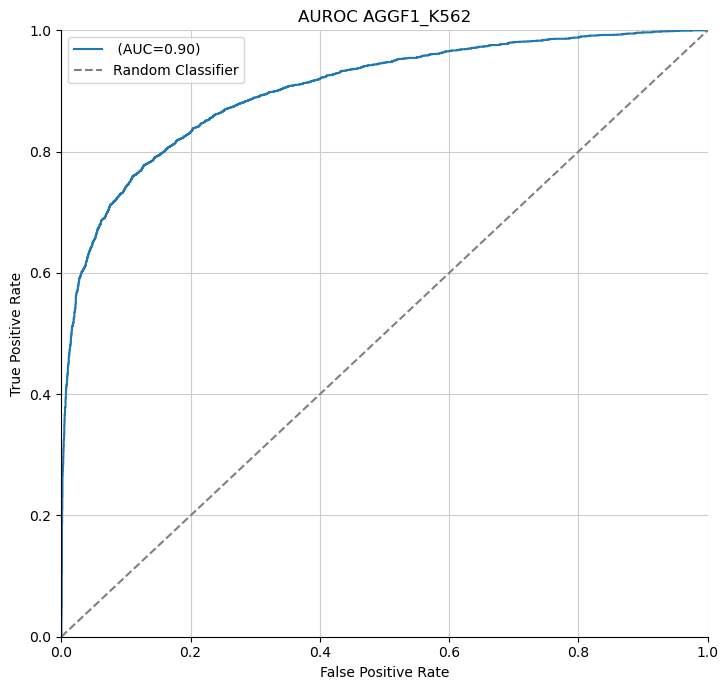

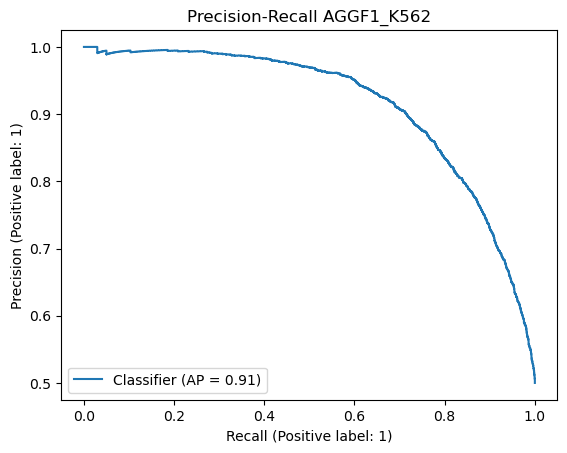

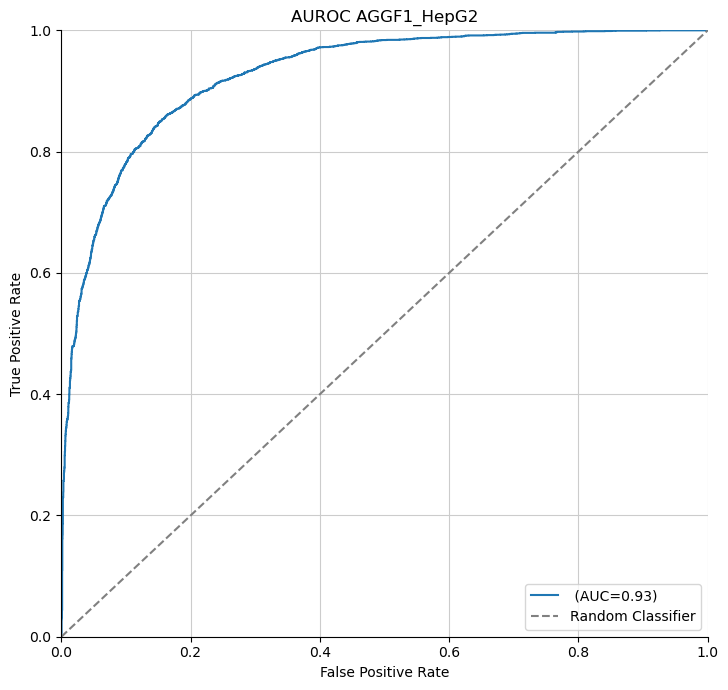

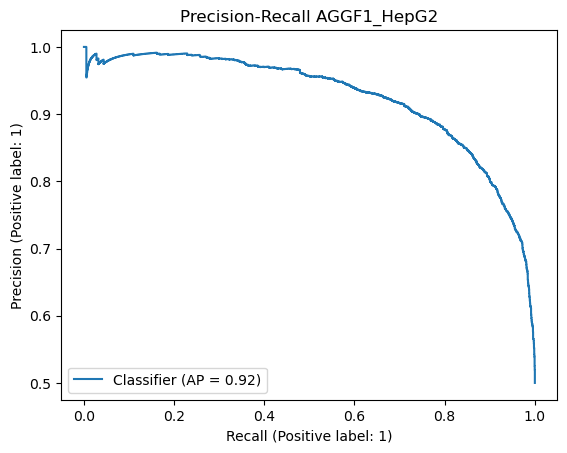

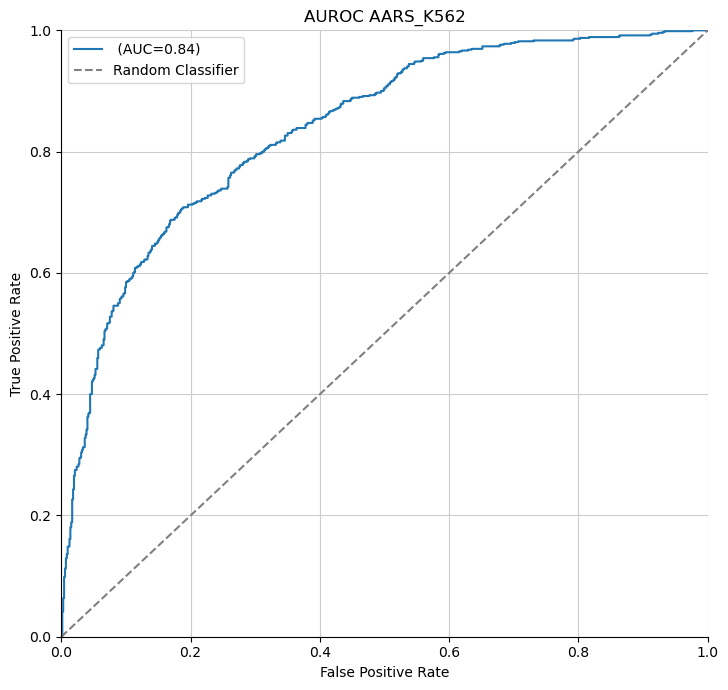

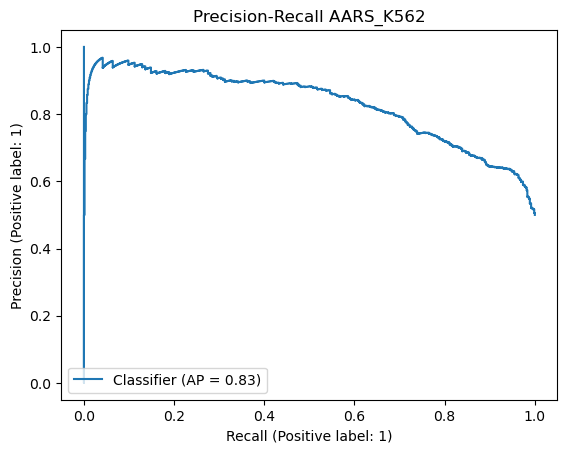

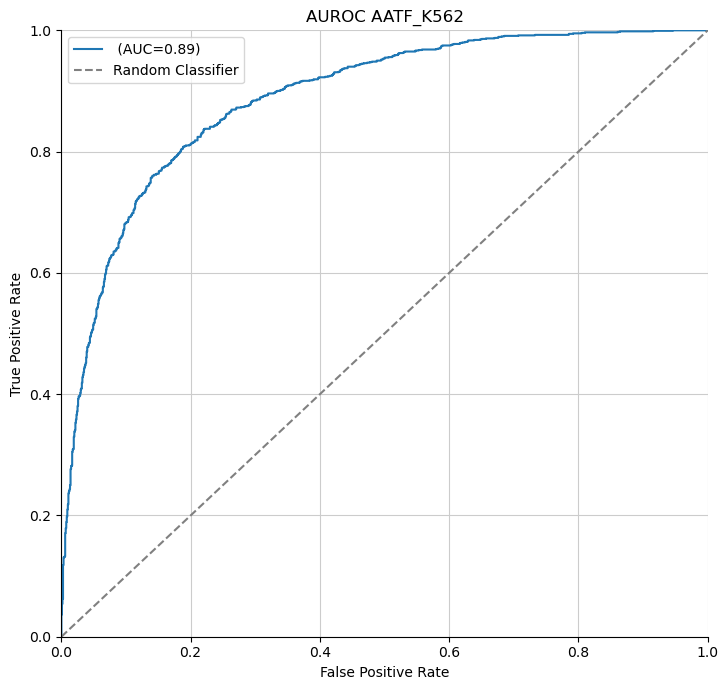

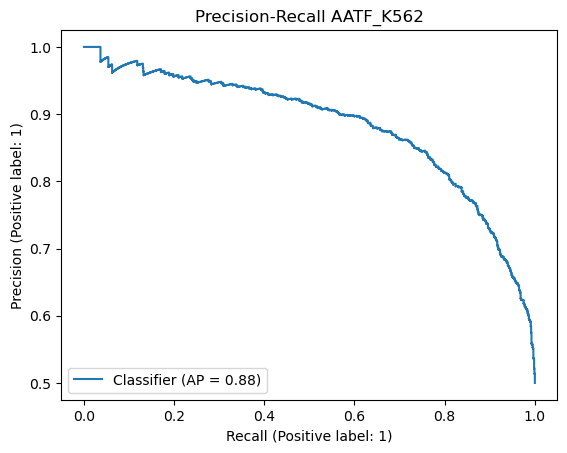

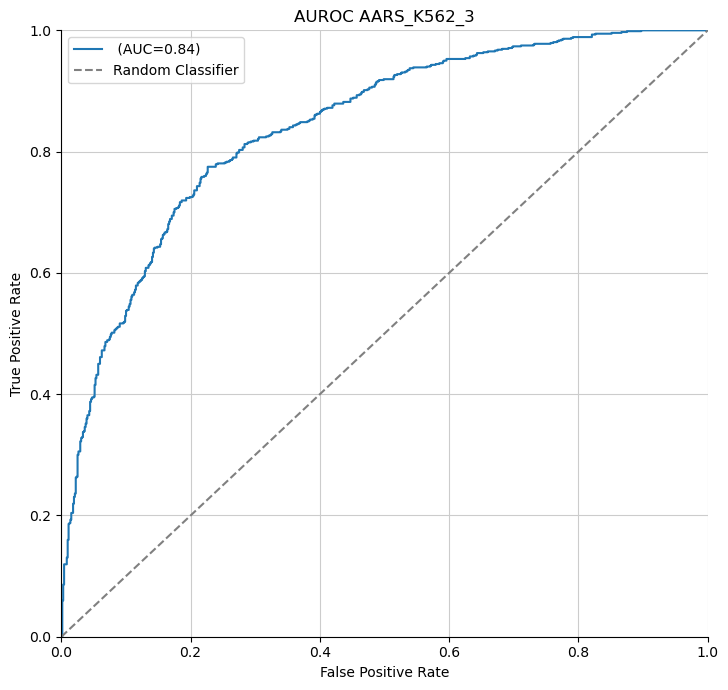

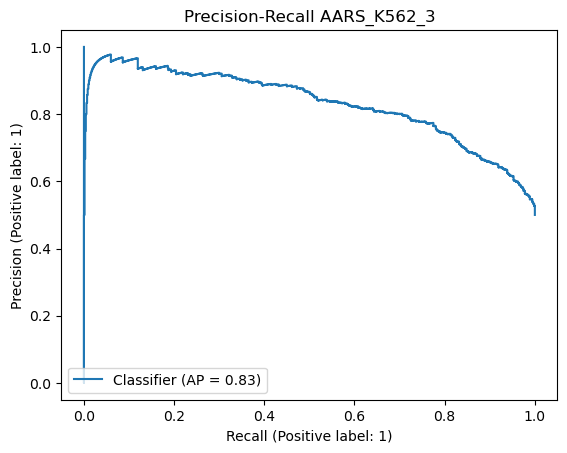

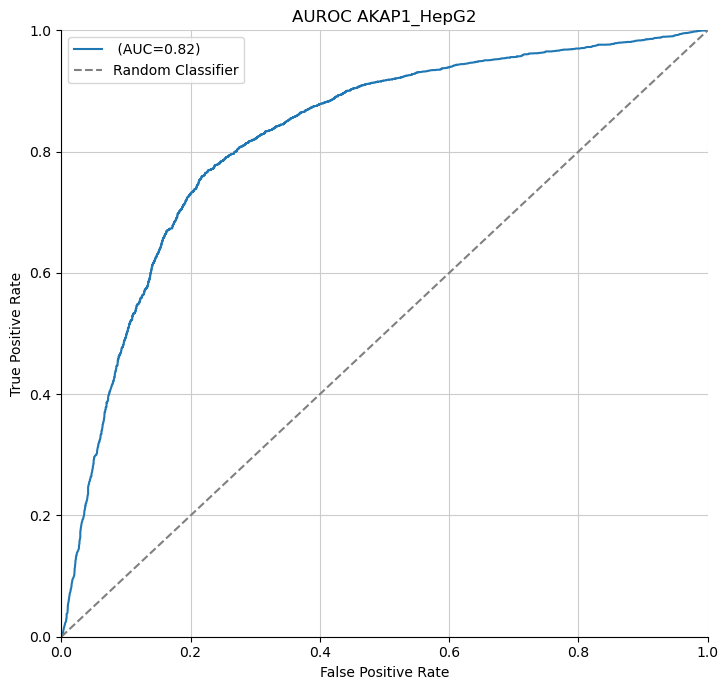

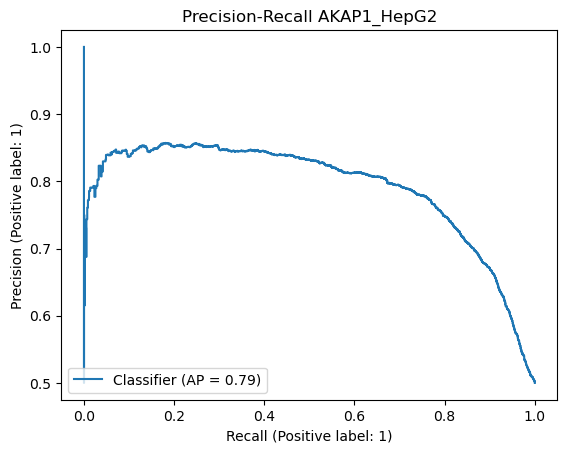

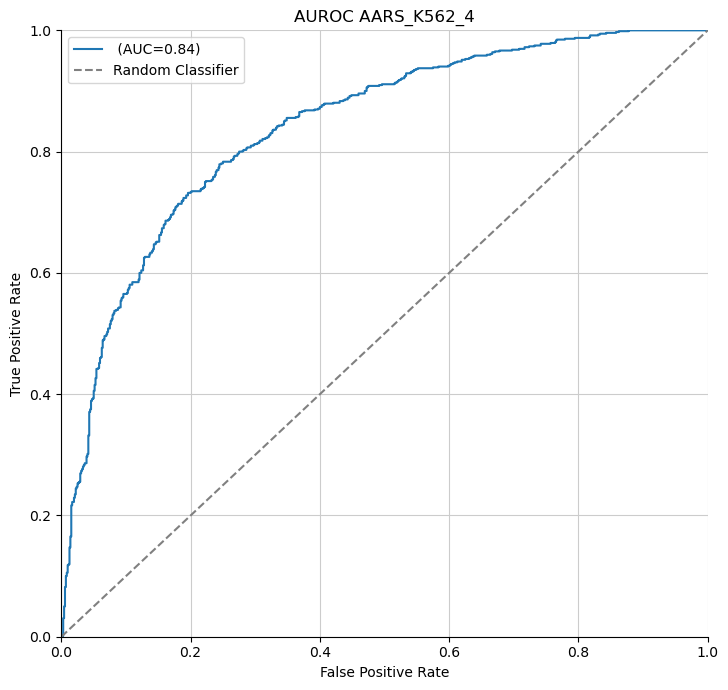

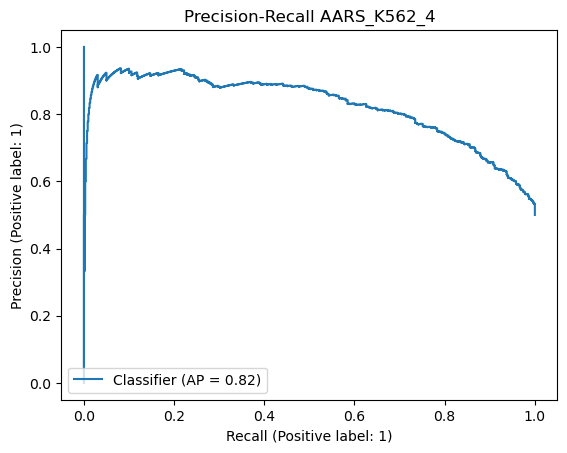

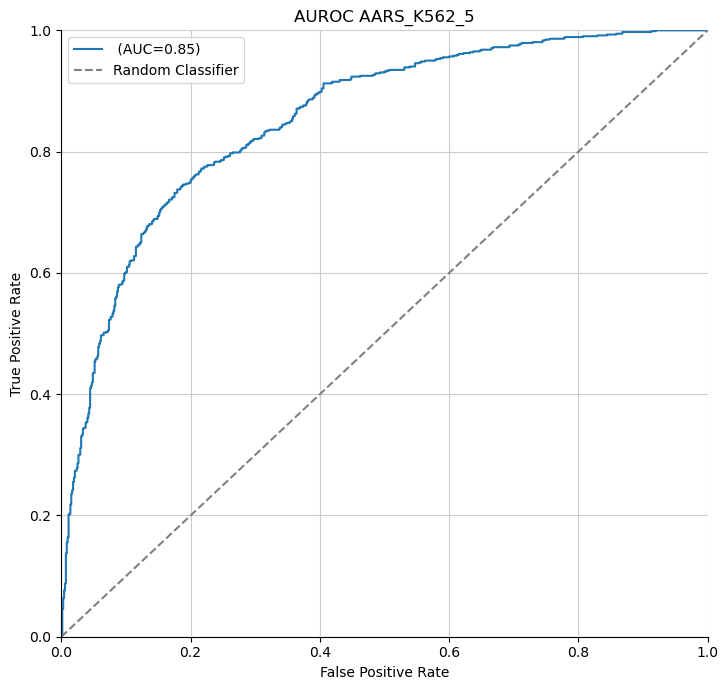

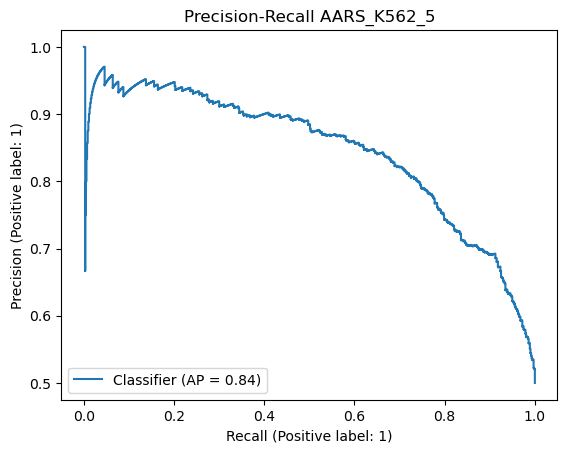

In [3]:
#auroc and auprc plots of all models separately and then boxplot of all roc_values
from matplotlib import pyplot as pt

path = 'predictions/'
directory1 = os.listdir(path)



#tic()

for file in directory1:
    
    
    #print(file)
    # Compute metrics for ROC Curve
    df = pd.read_csv(path + '/' + file)
    
    #roc_auc
    fpr, tpr, thresholds = metrics.roc_curve(df['True'], df['Predictions'], drop_intermediate=False)
    
    roc_auc = metrics.roc_auc_score(df['True'], df['Predictions'])
    

    # Generate figure
    fig = pl.figure(figsize=(14,7))
    ax = fig.add_subplot(121)

    pl.plot(fpr, tpr, label=" (AUC=%.2f)" % roc_auc)
    ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.grid(color="#CCCCCC")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rbp = str(file).split('.')[0]
    pt.title('AUROC %s' % rbp)
    pl.legend()
    pl.tight_layout()
    
    
    # pr_auc
    from sklearn.metrics import average_precision_score, precision_recall_curve
    from sklearn.metrics import PrecisionRecallDisplay
    average_precision = average_precision_score(df['True'], df['Predictions'])
    
    display = PrecisionRecallDisplay.from_predictions(df['True'], df['Predictions'])
    _ = display.ax_.set_title("Precision-Recall %s" % rbp)
    
    datafile= pd.DataFrame([[rbp, roc_auc, average_precision]], columns = ['rbp', 'roc_auc_score', 'pr_auc_score'] )
   
    
    data_auroc = pd.concat([data_auroc,datafile])


In [4]:
data_auroc

,rbp,roc_auc_score,pr_auc_score
0,AGGF1_K562,0.901789,0.913983
0,AGGF1_HepG2,0.926750,0.924621
0,AARS_K562,0.837575,0.830337
0,AATF_K562,0.887111,0.882449
0,AARS_K562_3,0.839500,0.831589
0,AKAP1_HepG2,0.824082,0.790143
0,AARS_K562_4,0.839340,0.823640
0,AARS_K562_5,0.853551,0.844688


[Text(0.5, 1.0, 'Receiver Operating Characteristic scores for the baseline model')]

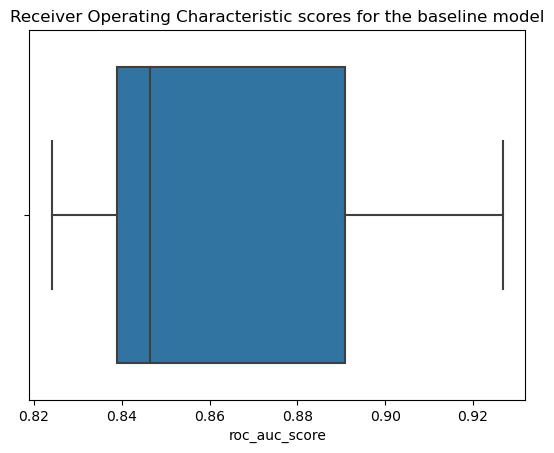

In [5]:
import seaborn as sns
sns.boxplot(x=data_auroc["roc_auc_score"]).set(title='Receiver Operating Characteristic scores for the baseline model')

[Text(0.5, 1.0, 'Precision Recall scores for the baseline model')]

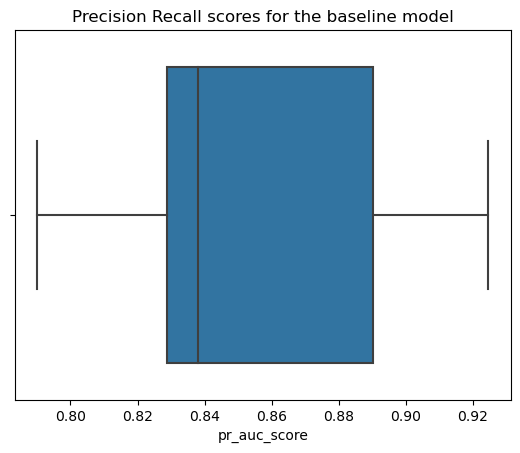

In [6]:
sns.boxplot(x=data_auroc["pr_auc_score"]).set(title='Precision Recall scores for the baseline model')

# Model Setting A - neg1

In [7]:
data_auroc_A = pd.DataFrame(columns = ['rbp', 'roc_auc_score', 'pr_auc_score'])

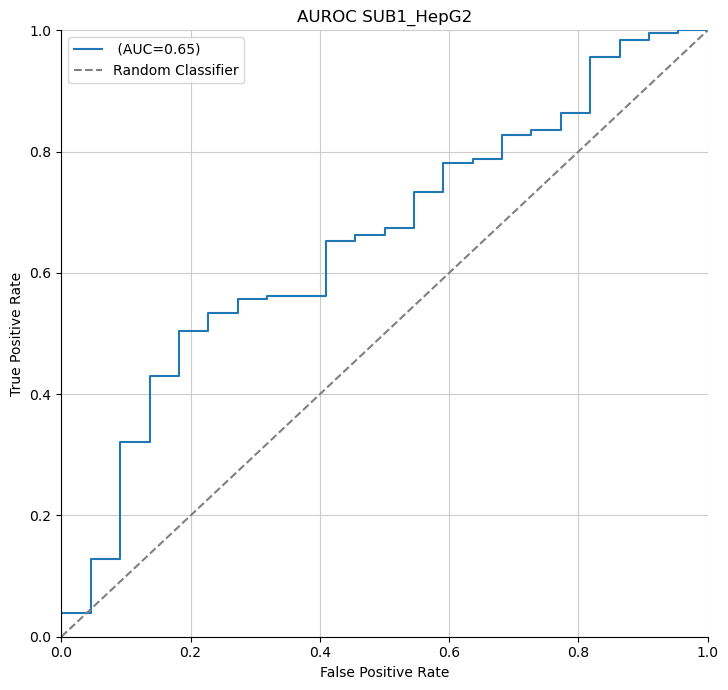

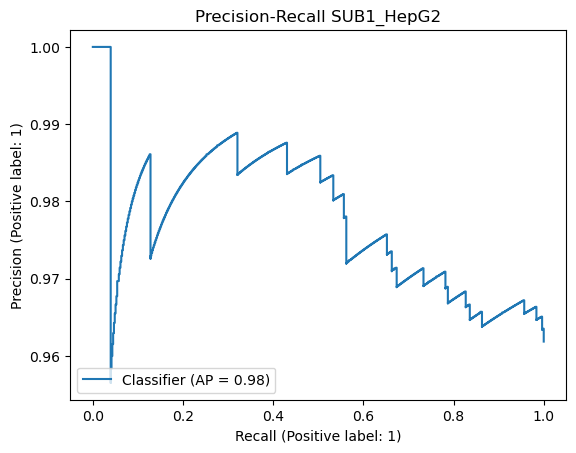

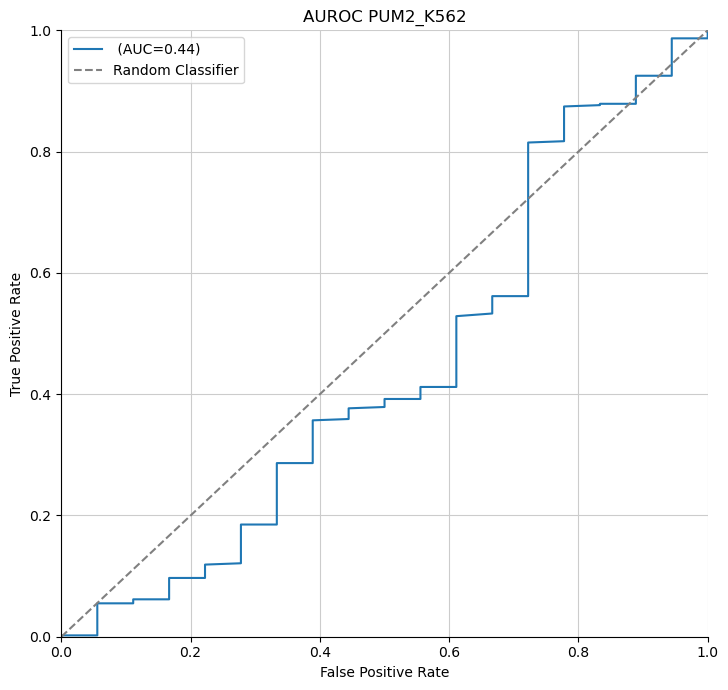

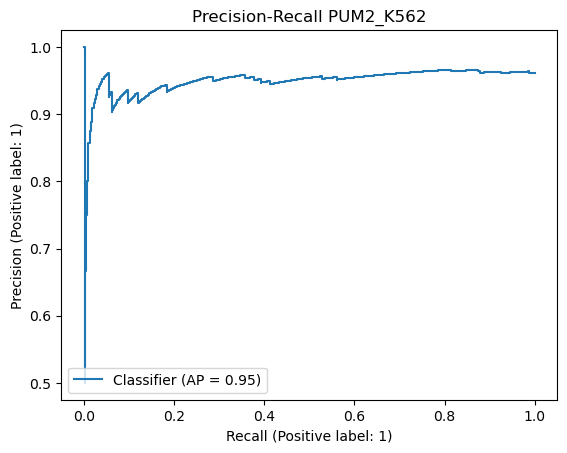

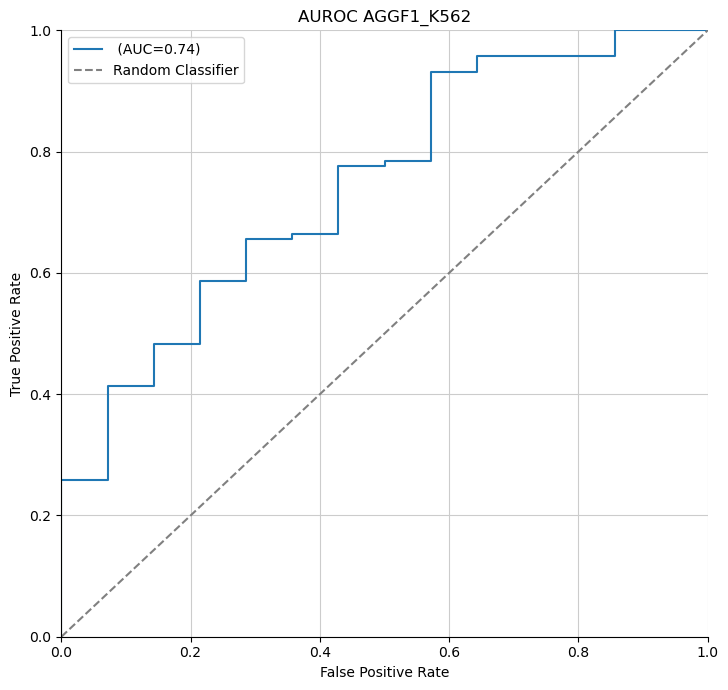

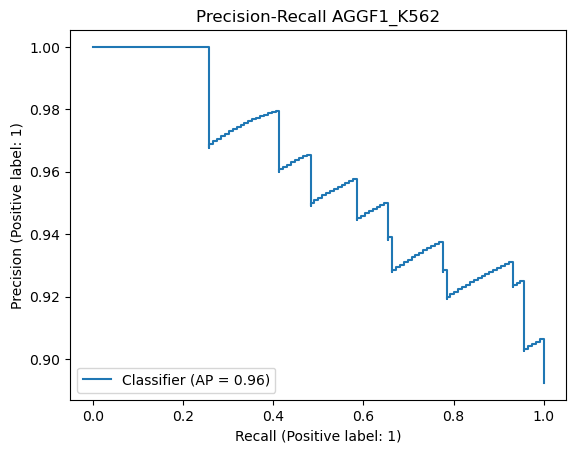

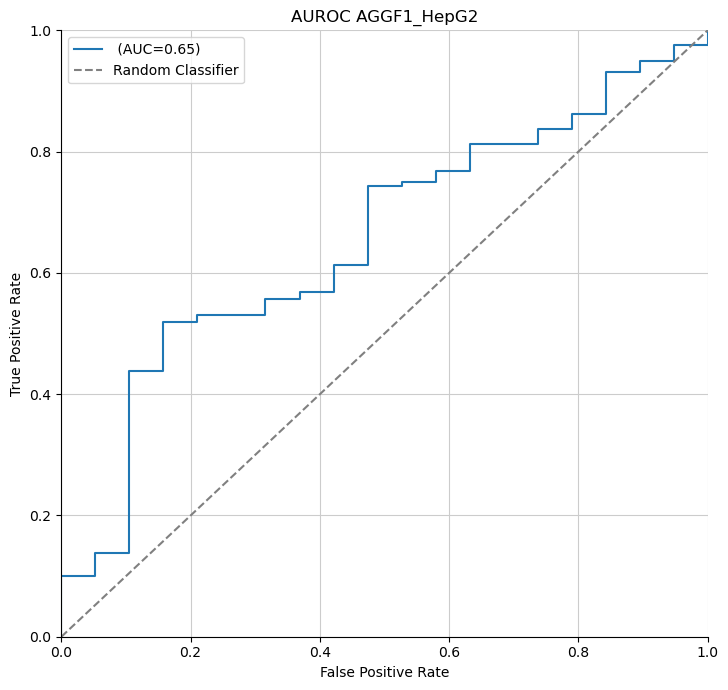

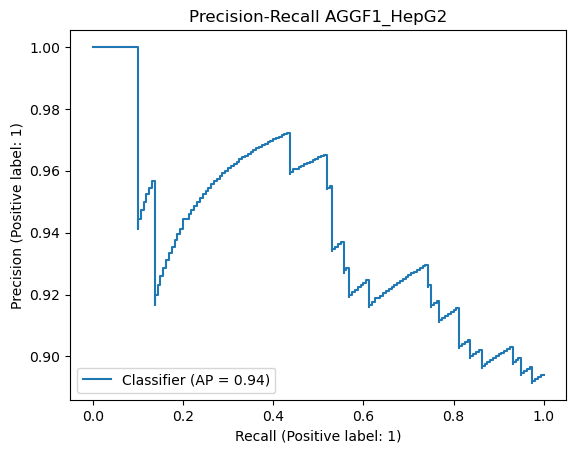

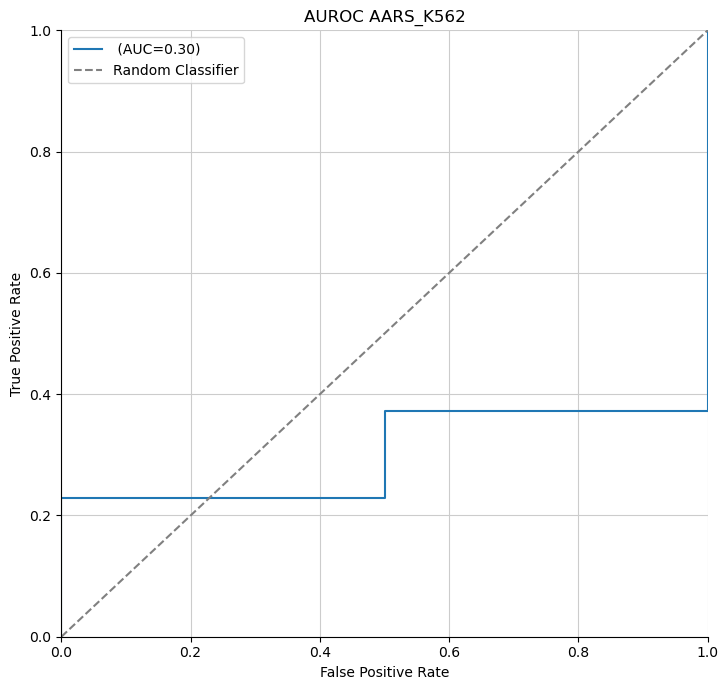

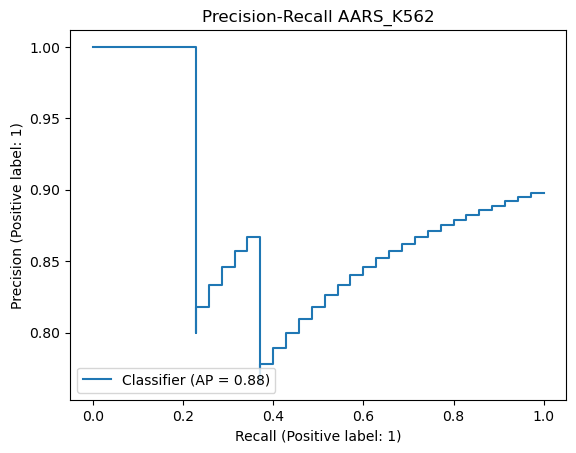

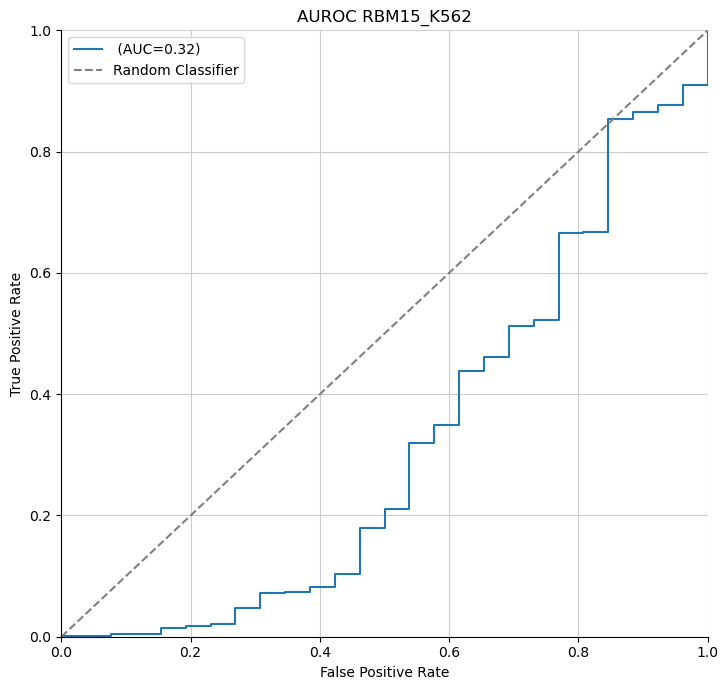

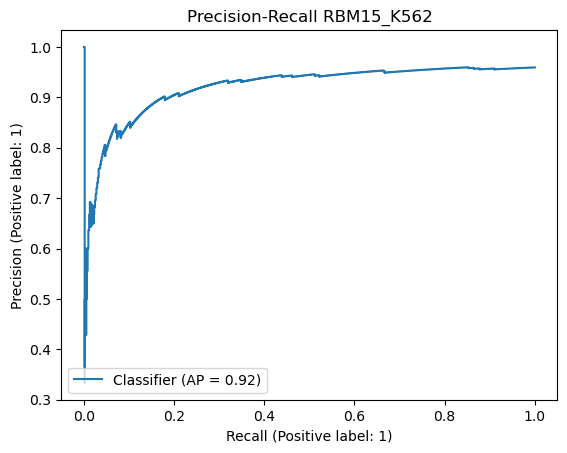

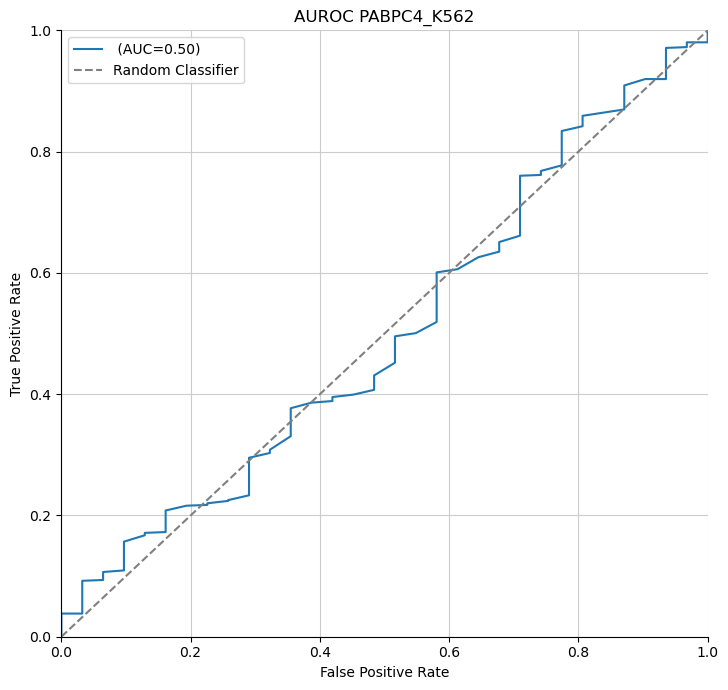

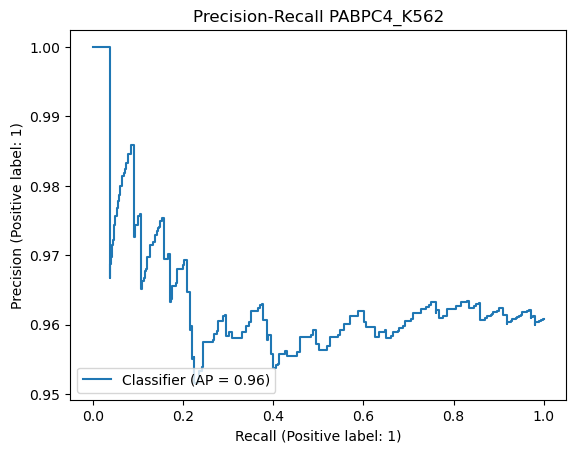

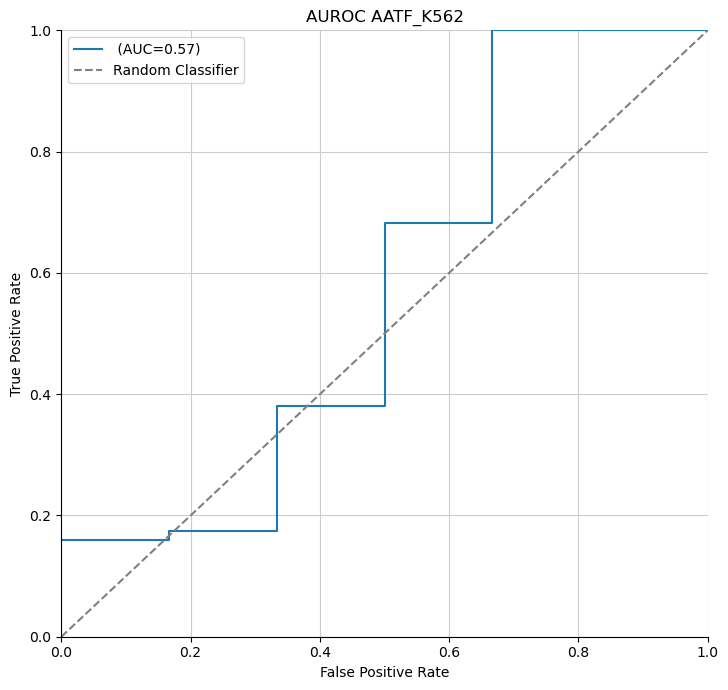

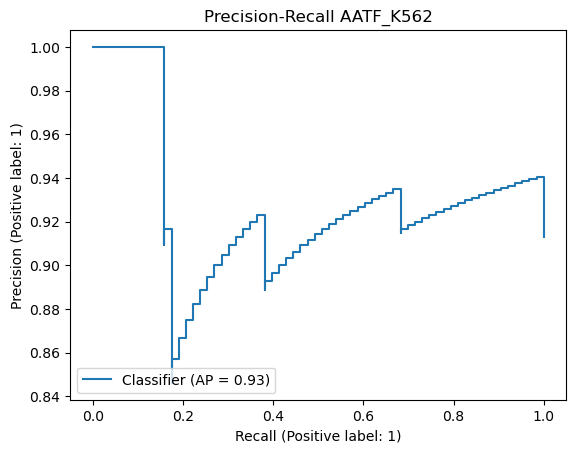

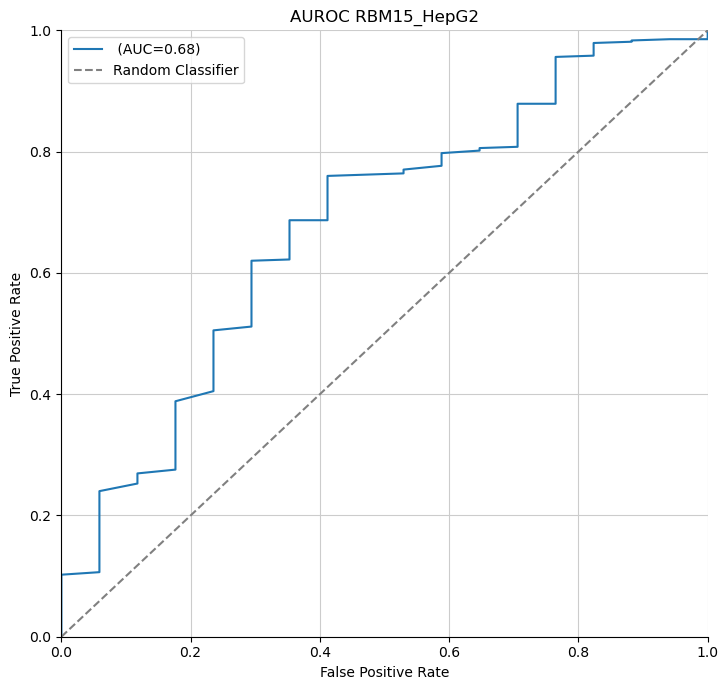

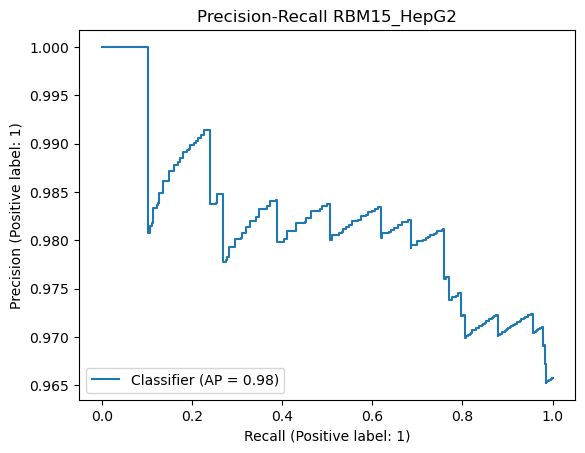

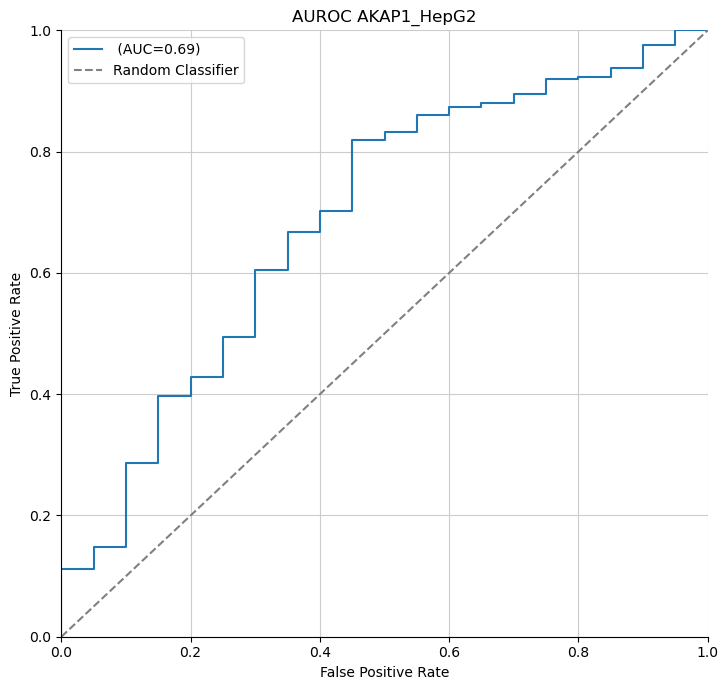

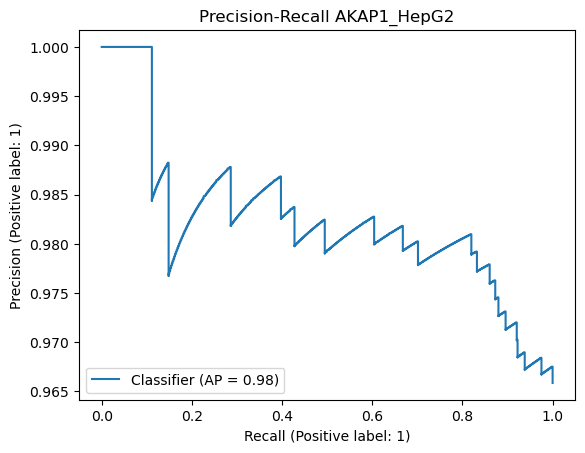

In [8]:
#auroc and auprc plots of all models separately and then boxplot of all roc_values
from matplotlib import pyplot as pt

path = 'predictions_A/'
directory1 = os.listdir(path)



#tic()

for file in directory1:
    
    
    #print(file)
    # Compute metrics for ROC Curve
    df = pd.read_csv(path + '/' + file)
    
    #roc_auc
    fpr, tpr, thresholds = metrics.roc_curve(df['True'], df['Predictions'], drop_intermediate=False)
    
    roc_auc = metrics.roc_auc_score(df['True'], df['Predictions'])
    

    # Generate figure
    fig = pl.figure(figsize=(14,7))
    ax = fig.add_subplot(121)

    pl.plot(fpr, tpr, label=" (AUC=%.2f)" % roc_auc)
    ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.grid(color="#CCCCCC")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rbp = str(file).split('.')[0]
    pt.title('AUROC %s' % rbp)
    pl.legend()
    pl.tight_layout()
    
    
    # pr_auc
    from sklearn.metrics import average_precision_score, precision_recall_curve
    from sklearn.metrics import PrecisionRecallDisplay
    average_precision = average_precision_score(df['True'], df['Predictions'])
    
    display = PrecisionRecallDisplay.from_predictions(df['True'], df['Predictions'])
    _ = display.ax_.set_title("Precision-Recall %s" % rbp)
    
    datafile_A= pd.DataFrame([[rbp, roc_auc, average_precision]], columns = ['rbp', 'roc_auc_score', 'pr_auc_score'] )
   
    
    data_auroc_A = pd.concat([data_auroc_A,datafile_A])


In [9]:
data_auroc_A

,rbp,roc_auc_score,pr_auc_score
0,SUB1_HepG2,0.654218,0.977400
0,PUM2_K562,0.440100,0.950033
0,AGGF1_K562,0.744458,0.959642
0,AGGF1_HepG2,0.654605,0.940324
0,AARS_K562,0.300000,0.884729
0,RBM15_K562,0.318296,0.920667
0,PABPC4_K562,0.499426,0.963526
0,AATF_K562,0.566138,0.929950
0,RBM15_HepG2,0.678006,0.981848
0,AKAP1_HepG2,0.687809,0.982308


[Text(0.5, 1.0, 'Receiver Operating Characteristic scores for the model setting A')]

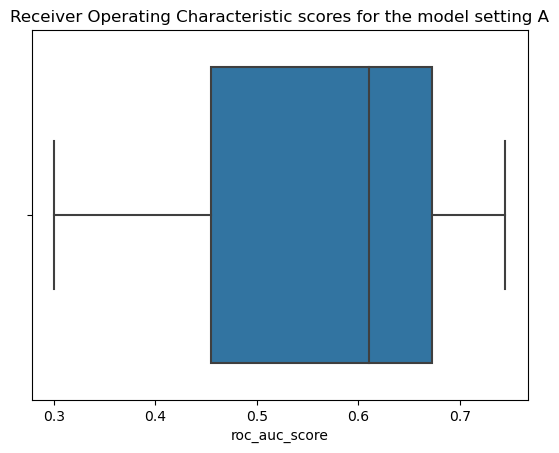

In [10]:
import seaborn as sns
sns.boxplot(x=data_auroc_A["roc_auc_score"]).set(title='Receiver Operating Characteristic scores for the model setting A')

[Text(0.5, 1.0, 'Precision Recall scores for the model setting A')]

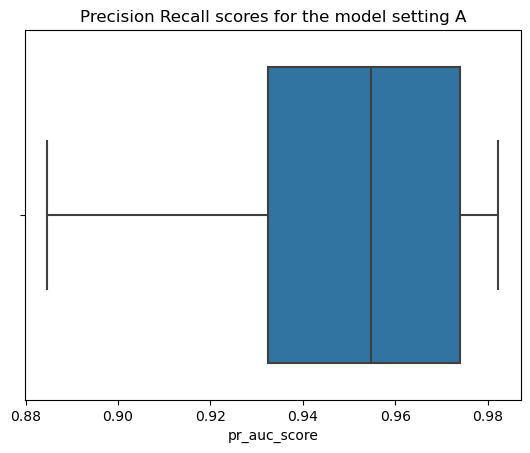

In [11]:
sns.boxplot(x=data_auroc_A["pr_auc_score"]).set(title='Precision Recall scores for the model setting A')

# Model Setting A - neg2

In [22]:
data_auroc_A_2 = pd.DataFrame(columns = ['rbp', 'roc_auc_score', 'pr_auc_score'])

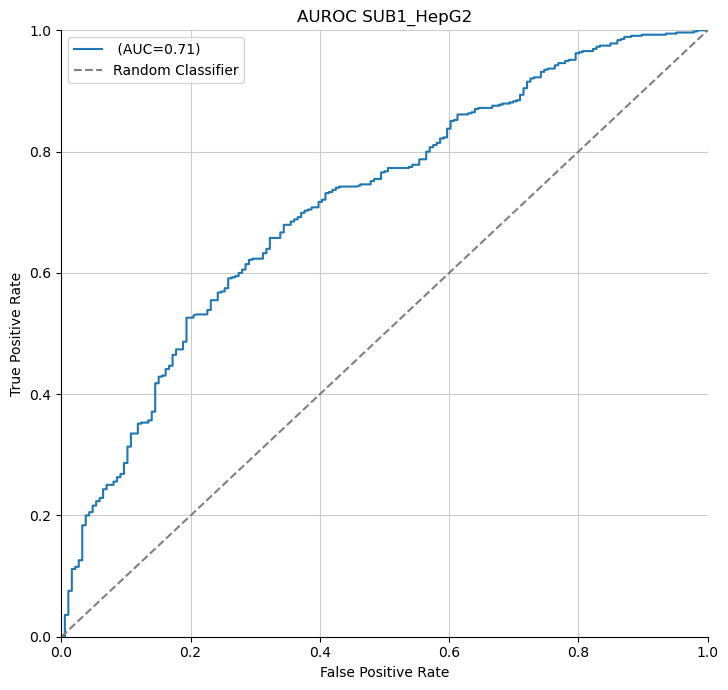

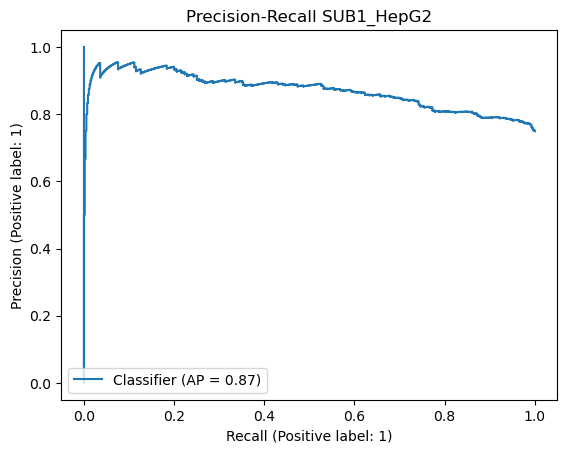

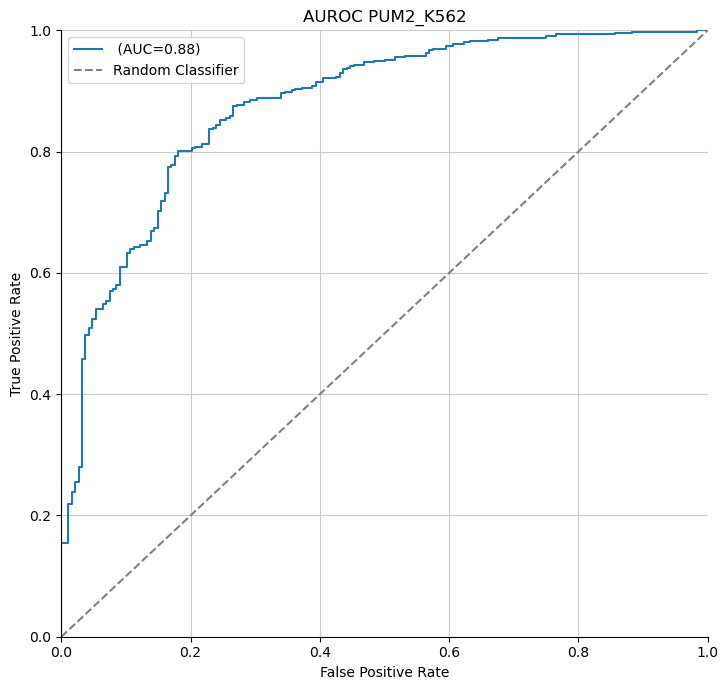

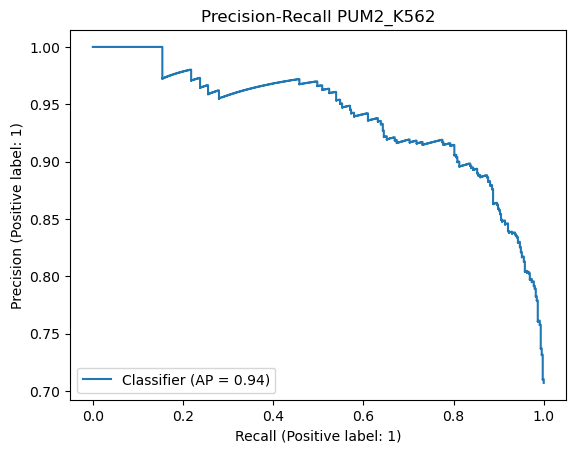

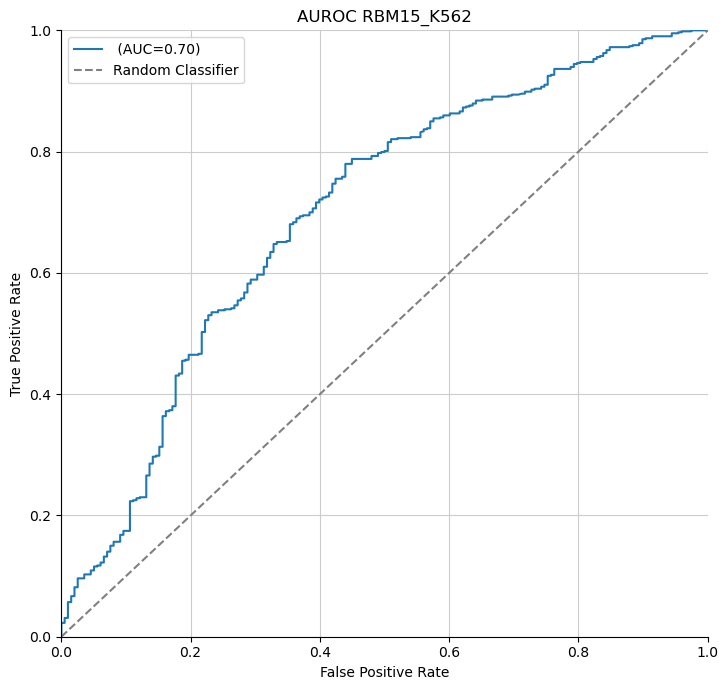

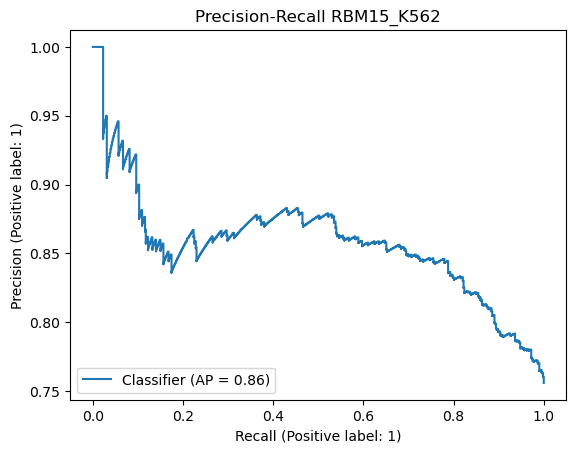

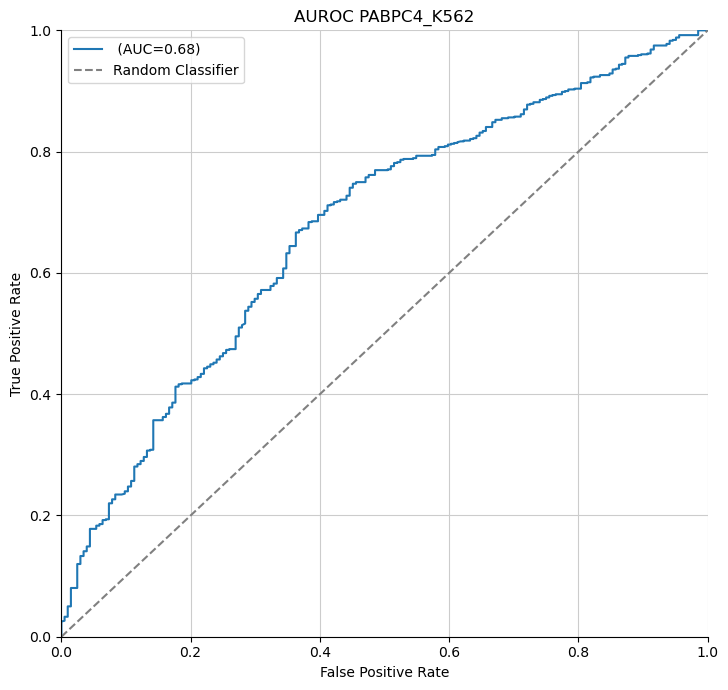

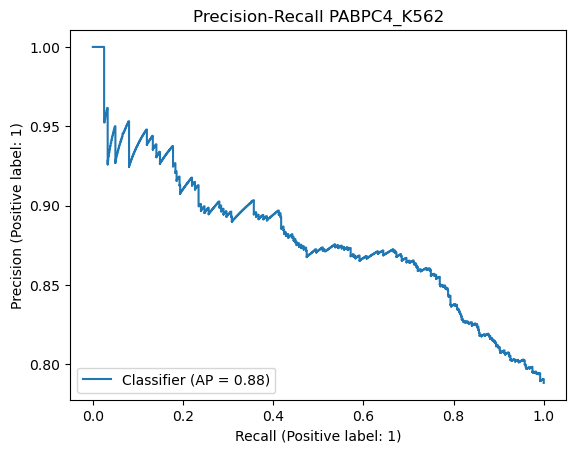

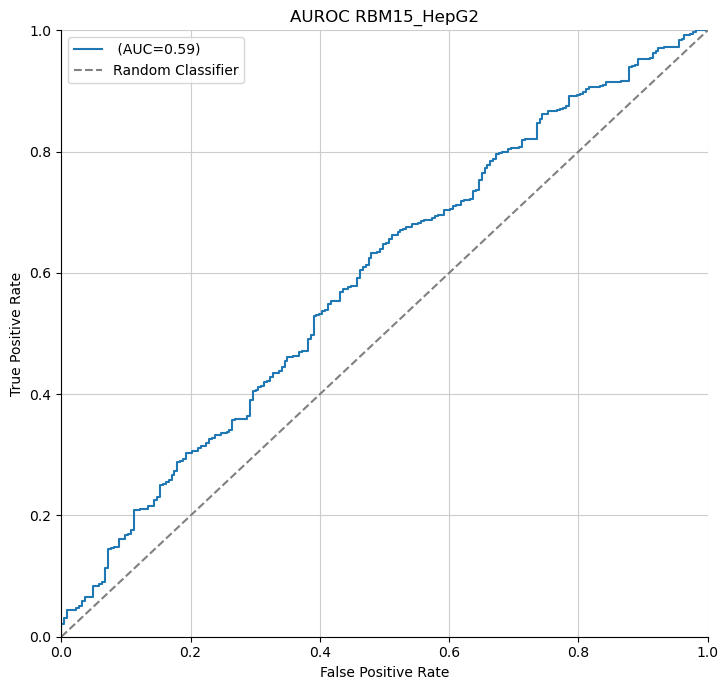

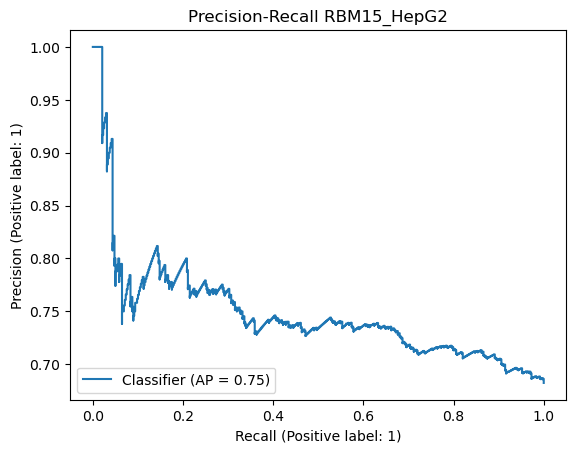

In [23]:
#auroc and auprc plots of all models separately and then boxplot of all roc_values
from matplotlib import pyplot as pt

path = 'predictions_A_2/'
directory1 = os.listdir(path)



#tic()

for file in directory1:
    
    
    #print(file)
    # Compute metrics for ROC Curve
    df = pd.read_csv(path + '/' + file)
    
    #roc_auc
    fpr, tpr, thresholds = metrics.roc_curve(df['True'], df['Predictions'], drop_intermediate=False)
    
    roc_auc = metrics.roc_auc_score(df['True'], df['Predictions'])
    

    # Generate figure
    fig = pl.figure(figsize=(14,7))
    ax = fig.add_subplot(121)

    pl.plot(fpr, tpr, label=" (AUC=%.2f)" % roc_auc)
    ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.grid(color="#CCCCCC")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rbp = str(file).split('.')[0]
    pt.title('AUROC %s' % rbp)
    pl.legend()
    pl.tight_layout()
    
    
    # pr_auc
    from sklearn.metrics import average_precision_score, precision_recall_curve
    from sklearn.metrics import PrecisionRecallDisplay
    average_precision = average_precision_score(df['True'], df['Predictions'])
    
    display = PrecisionRecallDisplay.from_predictions(df['True'], df['Predictions'])
    _ = display.ax_.set_title("Precision-Recall %s" % rbp)
    
    datafile_A_2= pd.DataFrame([[rbp, roc_auc, average_precision]], columns = ['rbp', 'roc_auc_score', 'pr_auc_score'] )
   
    
    data_auroc_A_2 = pd.concat([data_auroc_A_2,datafile_A_2])


In [24]:
data_auroc_A_2

,rbp,roc_auc_score,pr_auc_score
0,SUB1_HepG2,0.713891,0.868757
0,PUM2_K562,0.875738,0.938730
0,RBM15_K562,0.698181,0.857274
0,PABPC4_K562,0.676028,0.878667
0,RBM15_HepG2,0.588829,0.748164


[Text(0.5, 1.0, 'Receiver Operating Characteristic scores for the model setting A - neg2')]

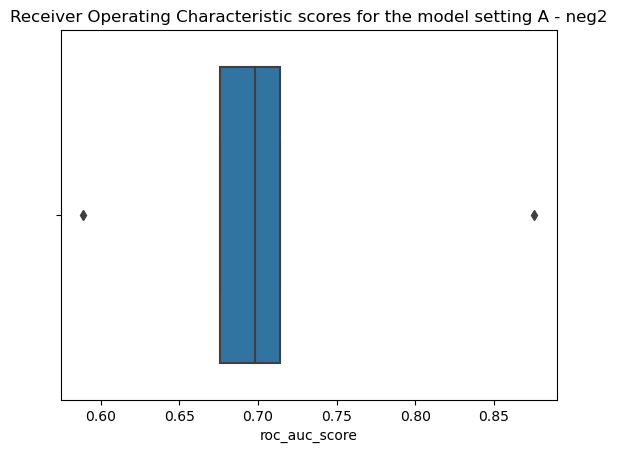

In [25]:
import seaborn as sns
sns.boxplot(x=data_auroc_A_2["roc_auc_score"]).set(title='Receiver Operating Characteristic scores for the model setting A - neg2')

[Text(0.5, 1.0, 'Precision Recall scores for the model setting A -neg2')]

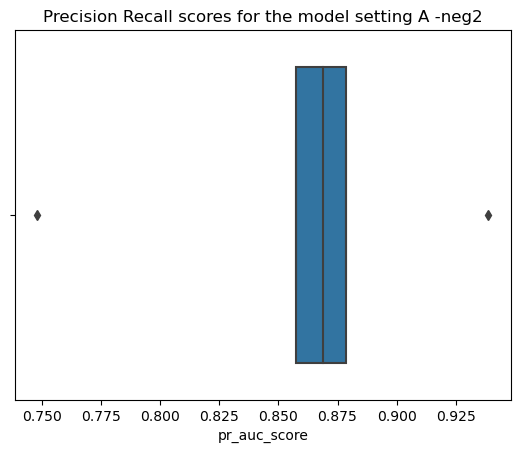

In [26]:
sns.boxplot(x=data_auroc_A_2["pr_auc_score"]).set(title='Precision Recall scores for the model setting A -neg2')

# Model Setting A - new neg1 dataset 

In [27]:
data_auroc_A_new = pd.DataFrame(columns = ['rbp', 'roc_auc_score', 'pr_auc_score'])

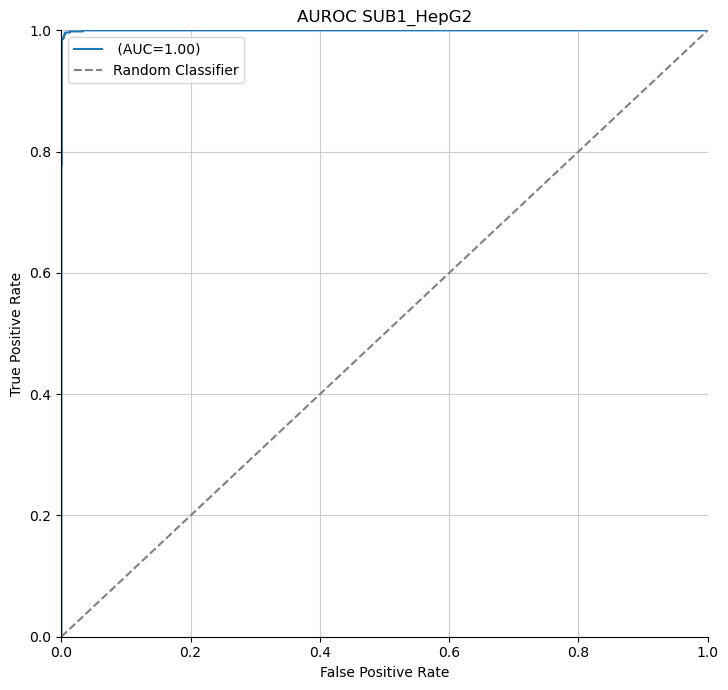

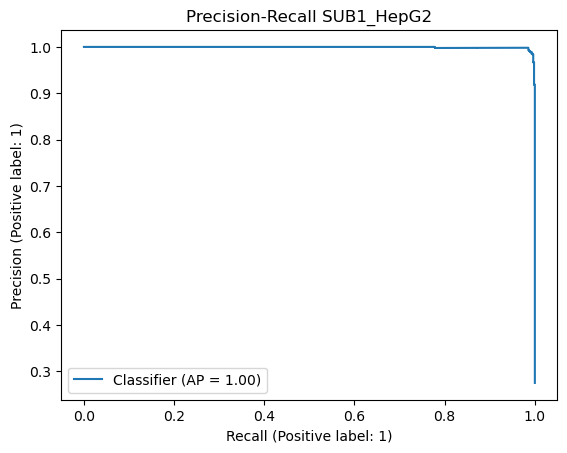

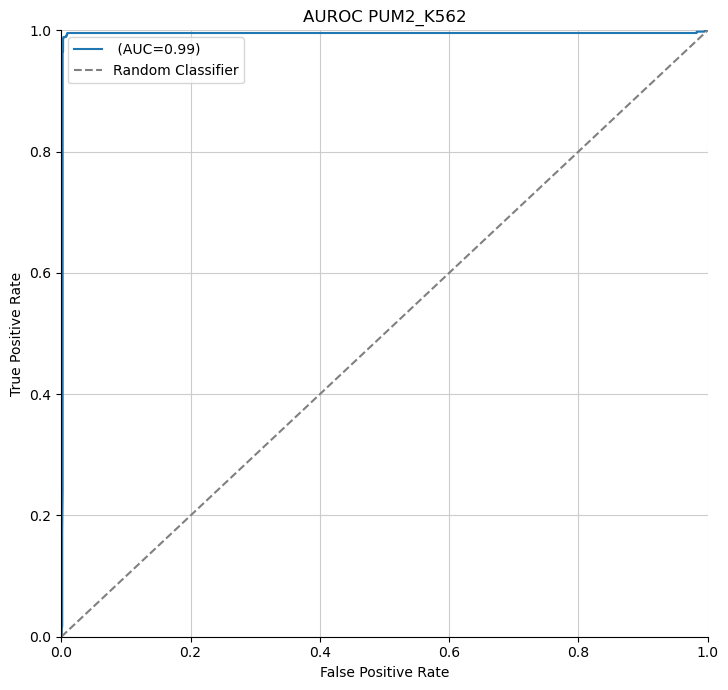

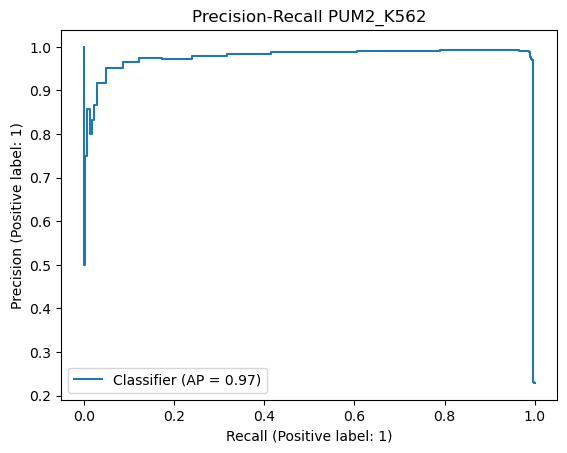

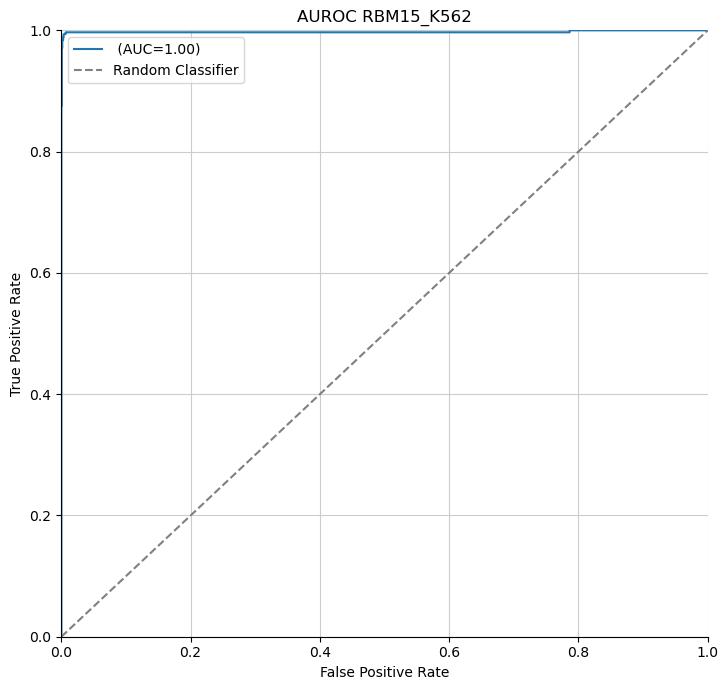

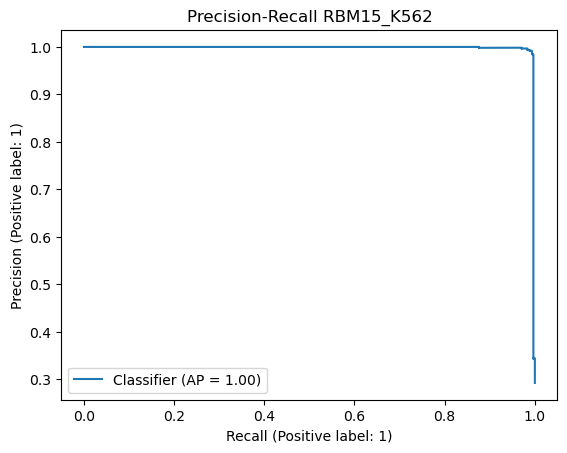

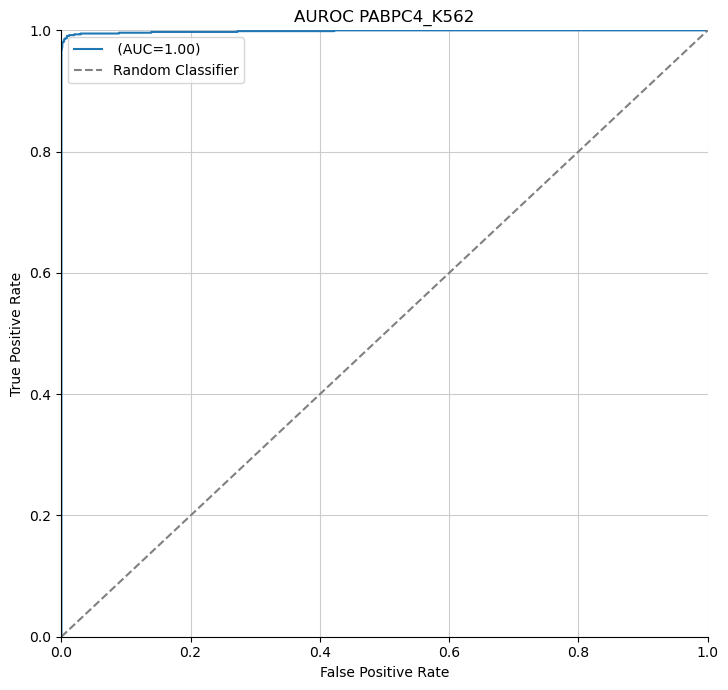

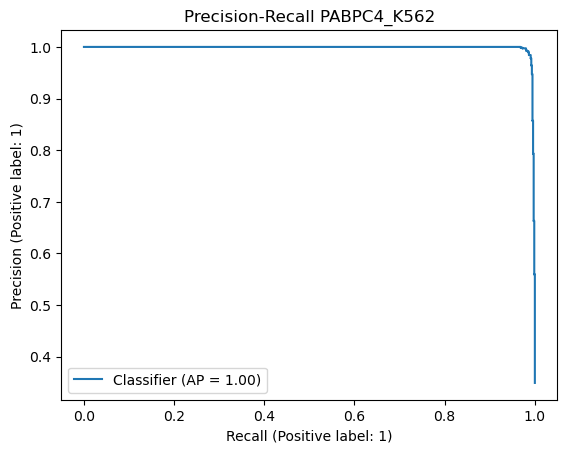

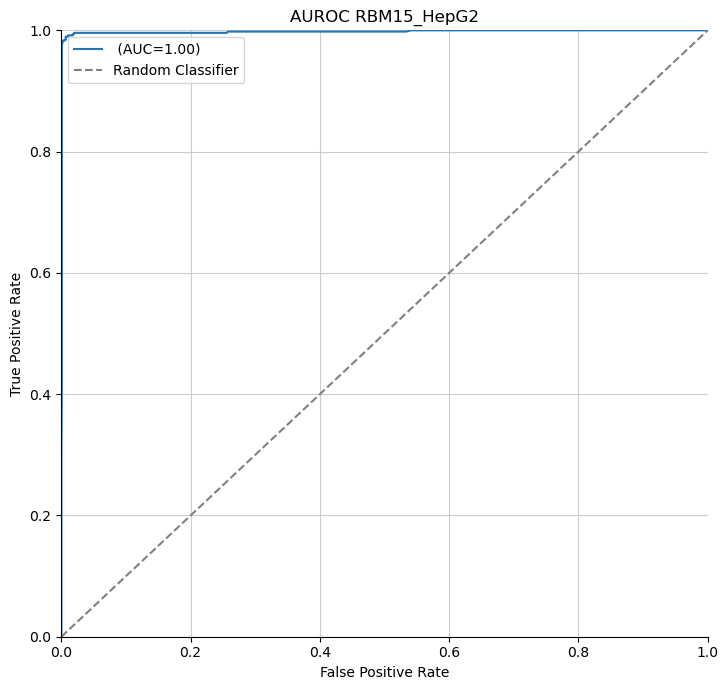

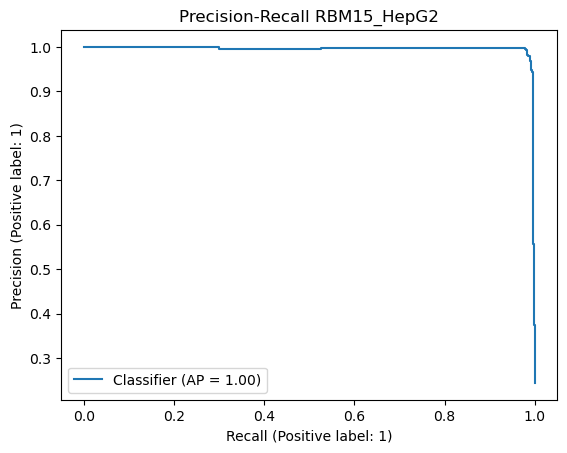

In [28]:
#auroc and auprc plots of all models separately and then boxplot of all roc_values
from matplotlib import pyplot as pt

path = 'predictions_A_new/'
directory1 = os.listdir(path)



#tic()

for file in directory1:
    
    
    #print(file)
    # Compute metrics for ROC Curve
    df = pd.read_csv(path + '/' + file)
    
    #roc_auc
    fpr, tpr, thresholds = metrics.roc_curve(df['True'], df['Predictions'], drop_intermediate=False)
    
    roc_auc = metrics.roc_auc_score(df['True'], df['Predictions'])
    

    # Generate figure
    fig = pl.figure(figsize=(14,7))
    ax = fig.add_subplot(121)

    pl.plot(fpr, tpr, label=" (AUC=%.2f)" % roc_auc)
    ax.plot([0,1], [0,1], color="grey",label="Random Classifier",linestyle="--")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_ylim(0,1)
    ax.set_xlim(0,1)
    ax.grid(color="#CCCCCC")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    rbp = str(file).split('.')[0]
    pt.title('AUROC %s' % rbp)
    pl.legend()
    pl.tight_layout()
    
    
    # pr_auc
    from sklearn.metrics import average_precision_score, precision_recall_curve
    from sklearn.metrics import PrecisionRecallDisplay
    average_precision = average_precision_score(df['True'], df['Predictions'])
    
    display = PrecisionRecallDisplay.from_predictions(df['True'], df['Predictions'])
    _ = display.ax_.set_title("Precision-Recall %s" % rbp)
    
    datafile_A_new= pd.DataFrame([[rbp, roc_auc, average_precision]], columns = ['rbp', 'roc_auc_score', 'pr_auc_score'] )
   
    
    data_auroc_A_new = pd.concat([data_auroc_A_new,datafile_A_new])


In [29]:
data_auroc_A_new

,rbp,roc_auc_score,pr_auc_score
0,SUB1_HepG2,0.999728,0.999247
0,PUM2_K562,0.993777,0.974430
0,RBM15_K562,0.997302,0.997529
0,PABPC4_K562,0.998628,0.998229
0,RBM15_HepG2,0.997779,0.995067


[Text(0.5, 1.0, 'Receiver Operating Characteristic scores for the model setting A - neg2')]

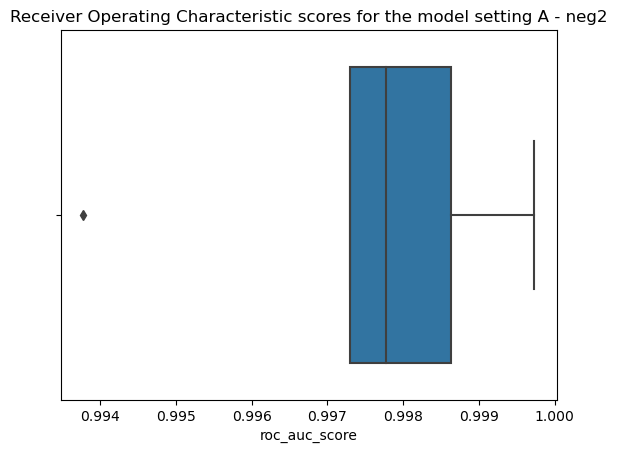

In [30]:
import seaborn as sns
sns.boxplot(x=data_auroc_A_new["roc_auc_score"]).set(title='Receiver Operating Characteristic scores for the model setting A - neg2')

[Text(0.5, 1.0, 'Precision Recall scores for the model setting A -neg2')]

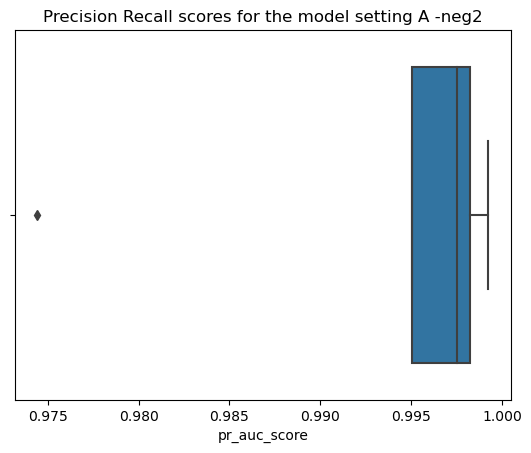

In [31]:
sns.boxplot(x=data_auroc_A_new["pr_auc_score"]).set(title='Precision Recall scores for the model setting A -neg2')